# Notebook 1: Introduction to Reinforcement Learning

Welcome to this hands-on tutorial on Reinforcement Learning (RL)! In this series of notebooks, we'll learn the fundamental concepts of RL by solving the classic **Inverted Pendulum** (Cart-Pole) problem.

## What You'll Learn

1. What is Reinforcement Learning?
2. Key concepts: Agent, Environment, State, Action, Reward
3. The RL loop
4. Why the Inverted Pendulum is a great learning problem

## Prerequisites

- Basic Python programming
- Basic understanding of NumPy
- High school physics (helpful but not required)

## 1. What is Reinforcement Learning?

Reinforcement Learning is a type of machine learning where an **agent** learns to make decisions by interacting with an **environment**.

Unlike supervised learning (where we have labeled examples) or unsupervised learning (where we find patterns), RL learns from **experience** through trial and error.

### Real-World Examples

- A robot learning to walk
- An AI playing video games
- A thermostat learning your preferences
- Self-driving cars

### The Key Idea

The agent takes **actions** in the environment, receives **rewards** (or penalties), and learns to maximize the total reward over time.

## 2. Key Concepts

Let's define the fundamental components of an RL system:

### Agent
The learner and decision-maker. In our case, it's the controller for the cart.

### Environment
Everything the agent interacts with. For us, it's the cart-pole system with physics.

### State (s)
A description of the current situation. For the pendulum:
- Cart position (x)
- Cart velocity (ẋ)
- Pole angle (θ)
- Pole angular velocity (θ̇)

### Action (a)
What the agent can do. For us: push the cart left or right (apply force).

### Reward (r)
Feedback signal. For the pendulum: +1 for each step the pole stays balanced.

### Policy (π)
The agent's strategy: a mapping from states to actions. This is what we want to learn!

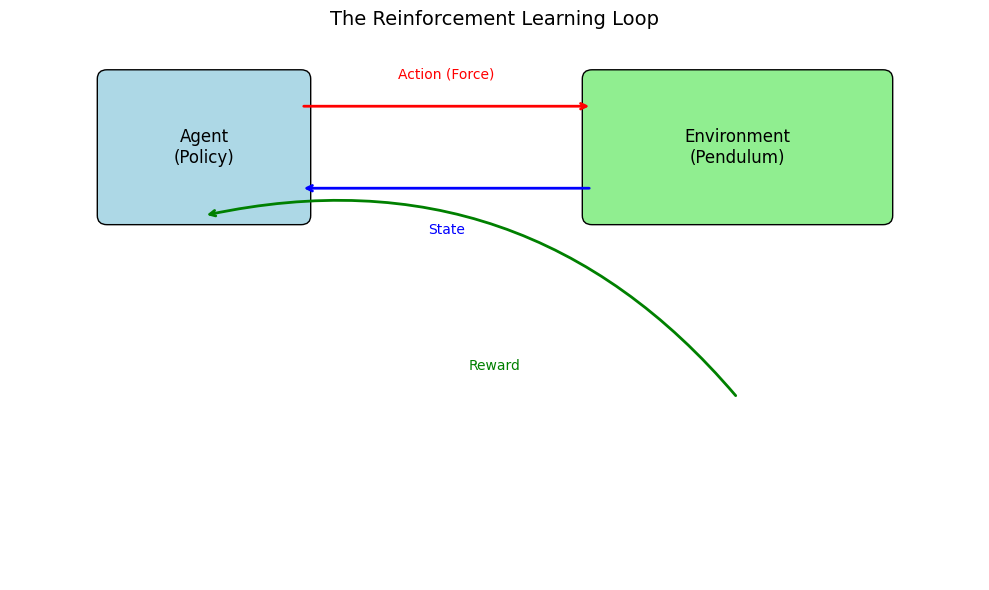

In [1]:
# Let's visualize the RL loop
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Agent box
agent = patches.FancyBboxPatch((1, 4), 2, 1.5, boxstyle="round,pad=0.1",
                                facecolor='lightblue', edgecolor='black')
ax.add_patch(agent)
ax.text(2, 4.75, 'Agent\n(Policy)', ha='center', va='center', fontsize=12)

# Environment box
env = patches.FancyBboxPatch((6, 4), 3, 1.5, boxstyle="round,pad=0.1",
                              facecolor='lightgreen', edgecolor='black')
ax.add_patch(env)
ax.text(7.5, 4.75, 'Environment\n(Pendulum)', ha='center', va='center', fontsize=12)

# Arrows
# Action arrow
ax.annotate('', xy=(6, 5.2), xytext=(3, 5.2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax.text(4.5, 5.5, 'Action (Force)', ha='center', fontsize=10, color='red')

# State arrow
ax.annotate('', xy=(3, 4.3), xytext=(6, 4.3),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax.text(4.5, 3.8, 'State', ha='center', fontsize=10, color='blue')

# Reward arrow
ax.annotate('', xy=(2, 4), xytext=(7.5, 2),
            arrowprops=dict(arrowstyle='->', color='green', lw=2,
                          connectionstyle='arc3,rad=0.3'))
ax.text(5, 2.3, 'Reward', ha='center', fontsize=10, color='green')

plt.title('The Reinforcement Learning Loop', fontsize=14)
plt.tight_layout()
plt.show()

## 3. The RL Loop

At each time step t:

1. Agent observes state $s_t$
2. Agent selects action $a_t = \pi(s_t)$
3. Environment transitions to state $s_{t+1}$
4. Agent receives reward $r_t$
5. Repeat!

The **goal** is to find a policy π that maximizes the **cumulative reward**:

$$G = \sum_{t=0}^{T} r_t$$

Or with discounting (to prefer sooner rewards):

$$G = \sum_{t=0}^{\infty} \gamma^t r_t$$

where $\gamma \in [0, 1]$ is the discount factor.

## 4. Why the Inverted Pendulum?

The inverted pendulum is a classic control problem that's perfect for learning RL because:

### Simple to Understand
- Clear physics (gravity, force, motion)
- Easy to visualize
- Intuitive goal (keep the pole balanced)

### Challenging Enough
- Unstable equilibrium (requires active control)
- Continuous state space
- Quick feedback (episodes are short)

### Great for Learning
- Simple policies can work (linear controller)
- Can scale to neural networks
- Fast to train and iterate

In [2]:
# Let's set up our environment and see it in action!
import sys
sys.path.append('..')

import numpy as np
from src.environments import InvertedPendulumEnv
from src.policies import RandomPolicy

# Create the environment
env = InvertedPendulumEnv()
print(env)
print(f"\nState variables: {env.get_state_labels()}")

InvertedPendulumEnv(cart_mass=1.0, pole_mass=0.1, pole_length=0.5)

State variables: ['Cart Position (m)', 'Cart Velocity (m/s)', 'Pole Angle (rad)', 'Pole Angular Velocity (rad/s)']


In [3]:
# Let's run a single episode with a random policy
policy = RandomPolicy()

# Reset the environment
state = env.reset(seed=42)
print(f"Initial state: {state}")
print(f"  - Cart position: {state[0]:.3f} m")
print(f"  - Cart velocity: {state[1]:.3f} m/s")
print(f"  - Pole angle: {np.degrees(state[2]):.2f} degrees")
print(f"  - Angular velocity: {state[3]:.3f} rad/s")

Initial state: [-0.01254599  0.04507143  0.02319939  0.00986585]
  - Cart position: -0.013 m
  - Cart velocity: 0.045 m/s
  - Pole angle: 1.33 degrees
  - Angular velocity: 0.010 rad/s


In [4]:
# Run the episode
total_reward = 0
done = False
step = 0

while not done:
    # Agent selects action
    action = policy.get_action(state)
    
    # Environment step
    state, reward, done, info = env.step(action)
    total_reward += reward
    step += 1

print(f"\nEpisode finished after {step} steps")
print(f"Total reward: {total_reward}")
print(f"\nTermination reason:")
if info['terminated_by_angle']:
    print(f"  - Pole fell over (angle too large)")
if info['terminated_by_position']:
    print(f"  - Cart went off track")
if info['terminated_by_time']:
    print(f"  - Maximum steps reached (success!)")


Episode finished after 17 steps
Total reward: 16.0

Termination reason:
  - Pole fell over (angle too large)


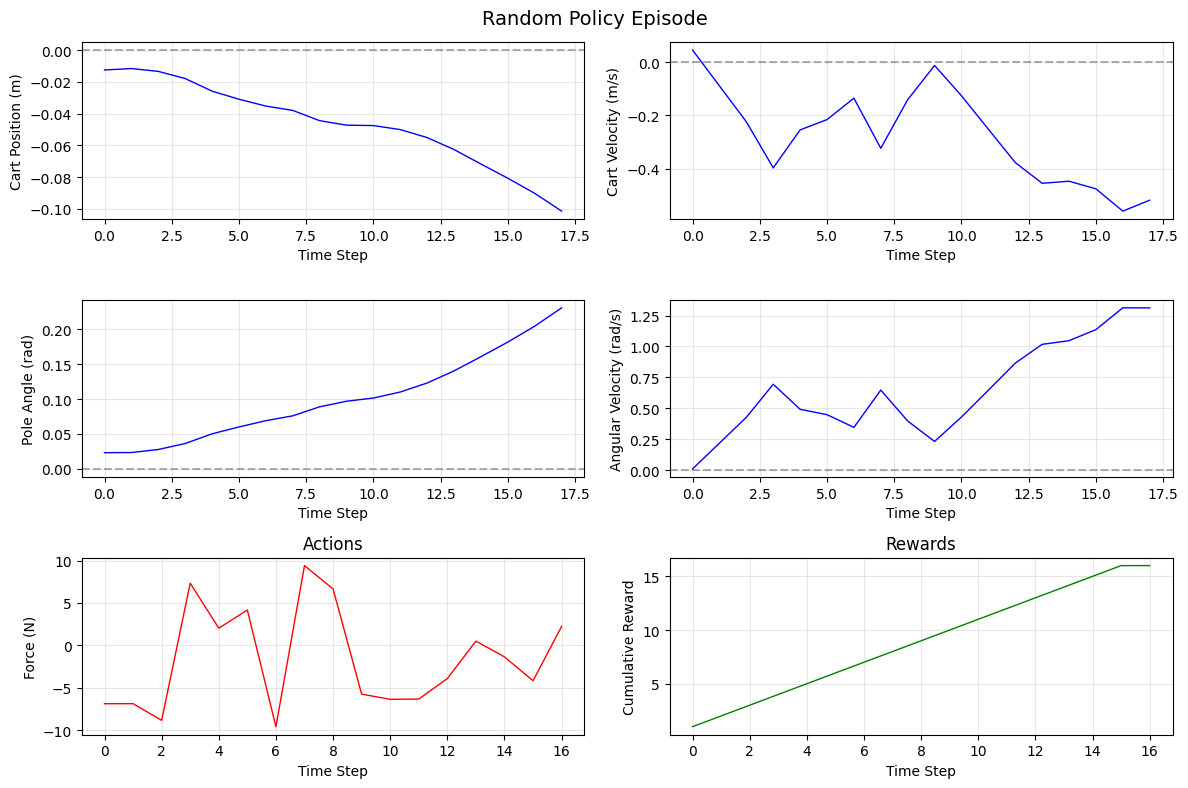

In [5]:
# Visualize the episode
from src.utils import plot_trajectory

history = env.get_history()
fig = plot_trajectory(history, title="Random Policy Episode")
plt.show()

## Exercises

Try these to solidify your understanding:

### Exercise 1: Multiple Episodes
Run 10 episodes with the random policy and calculate the average reward.

### Exercise 2: Understand the State
Modify the code to print the state at each step. Watch how the angle changes!

### Exercise 3: Think About Policy
If the pole is leaning right (positive theta), what action should you take? Write down your intuition.

In [6]:
# Exercise 1: Your code here
# Hint: Use a loop and track rewards

rewards = []
for episode in range(10):
    state = env.reset()
    total = 0
    done = False
    while not done:
        action = policy.get_action(state)
        state, reward, done, info = env.step(action)
        total += reward
    rewards.append(total)

print(f"Average reward over 10 episodes: {np.mean(rewards):.1f}")
print(f"Best episode: {max(rewards):.0f}")
print(f"Worst episode: {min(rewards):.0f}")

Average reward over 10 episodes: 30.2
Best episode: 70
Worst episode: 13


## Summary

In this notebook, we learned:

- **Reinforcement Learning** is learning from interaction (trial and error)
- Key components: **Agent**, **Environment**, **State**, **Action**, **Reward**, **Policy**
- The RL loop: observe → act → receive reward → repeat
- Goal: find a policy that maximizes cumulative reward
- The **inverted pendulum** is our testbed for learning RL

## Next Steps

In the next notebook, we'll dive into the **physics of the inverted pendulum** and understand why balancing it is challenging!